# Data Wrangling Template

### Introduction 

The Data Quality section focuses on assessing the quality of the data, including any inconsistencies or missing values.
In the WeRateDogs data we will be analysing data by cleaning sections details the steps that need to be taken to clean 
the data, such as removing duplicate records or correcting data values.
furthermore contains the results of data wrangling process and the insights that can be gained from data.

The data we will be looking at is from a twitter account name WeRateDogsates people's dogs with a humorous comment about 
the dog. These ratings almost always have a denominator of 10.Almost always greater than 10. 


## Gather

In [125]:
# Importing data 
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io, json
from decouple import config
import tweepy

In [126]:
# Instantiate variables and objects

# Get env variables stored in a .env file
API_KEY = config("API_KEY", default='')
SECRET_KEY = config("SECRET_KEY", default='')

auth = tweepy.OAuth1UserHandler(API_KEY, SECRET_KEY)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [127]:
# Import The WeRateDogs archive data
enhanced_df = pd.read_csv('twitter-archive-enhanced.csv')

# Get image predictions data and store it in a dataframe
data = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv').text
buffer = io.StringIO(data)
image_df = pd.read_csv(buffer,sep="\t")

## Query the twitter api using enhanced df to create tweet-json.txt

In [128]:
# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = enhanced_df.tweet_id.values
len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)


2356

### Read tweet-json.txt to create a dataframe

In [129]:
with open("tweet-json.txt", "r") as file:
    rows = file.read().split("\n")
    data = []

    for row in rows:
        if not row:
            continue
        data.append(json.loads(row))

df = pd.DataFrame(data)



## Assess Data

### In section the following will be done 
####  * Use both visual  and programatic assessment.
####  * I will iclude at least eight(8) data quality issues.
####  * Will include at least two(2) tidiness issues.
#### * Document a few issue in a few sentences.

### Enhanced Twitter Archive

In [130]:
# Displaying data to be analysed 
# there is alot of missing data 
# description headers are too long and close to each other making it difficult to tell apart which header belongs 
# Names sometime abbreviated like a Instead of full sentence 

enhanced_df


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [131]:
# The data seems to be consistent no changes 
enhanced_df.tail()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [132]:
# looking at the consistancy of the data
enhanced_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [133]:
enhanced_df.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1867,675334060156301312,NaN,NaN,2015-12-11 15:19:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Good morning here's a grass pupper. 12/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675334060...,12,10,None,None,None,pupper,None


### .info is a compendious summary of the dataframe
 >It shows total coulmns which is 17.
 > Data type 
 > The number of rows and coulumns 
 > The headers of each column 
 > memory usage 

##### Quality assessment -
missing values in_reply_to_status_id,in_reply_to_status_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls the total which is showing \
from tweet id and most of the data show a total of 2356 records meaning anything less is missing data.

In [134]:
enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [135]:
enhanced_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [136]:
# value count 
# enhanced['enhanced'].value_counts() there is an error message 

enhanced_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [137]:
enhanced_df.floofer.value_counts()


None       2346
floofer      10
Name: floofer, dtype: int64

In [138]:
enhanced_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [139]:
enhanced_df.puppo.value_counts()


None     2326
puppo      30
Name: puppo, dtype: int64

enhanced_df.rating_numerator.sort_values()

### 2. Dataframe (Image)

In [140]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [141]:
image_df.info()

# .info gets information of the data including data type 
# The number of rows are not missing.
# It has a total of 12 collumns and 2075 rows.
# Different data type.
### Visualisation assessment -Number of rows are not missing 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### 3. Dataframe (tweet-json.tx)
#### Returning data for tweet jason for analysis 


In [142]:
# Quality assessment- Some rows are missing 
# Dataframe has 31 colunms and 2353 rows
# Different data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [143]:
# 
df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,False,False,en,NaN,NaN,NaN,NaN
2350,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,False,False,en,NaN,NaN,NaN,NaN
2351,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,False,False,en,NaN,NaN,NaN,NaN
2352,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,False,False,en,NaN,NaN,NaN,NaN


## Quality assesment 

* Missing values in columns  
* Dog names are sometimes abbreviated like a Instead of full sentence 
* Correct columns with wrong data types 
* Some data in ratting was not extracted correctly 
* The dog names are sometimes first letter capital but sometimes not. Keep the name format consistent.
* The columns’ names are not clear and straightforward such as p1, p2.
* Remove all the unnecessary columns directly ('retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id', 'in_reply_to_user_id).
* What need to be done is to capitalize the first letter of dog name for consistence.
* I need to capitalize the first letter of first prediction in image_predictions (I could do that for all the predictions, but I decide to only apply to the first prediction since this variable is the important one).

## Tidiness

 * Merging the three data into one                                               

### Visualisation assessment 

* Missing data. 

## Clean

In this section 
 * Make a copy of the data before cleaning. 
 * Define-code-test framework.
 * Use and Define-code-test framework.
 * Clean all issues identified in the assessing phase.
 * Create a tidy master dataset with all pieces, cleanied data.

In [144]:
# create a copy of the dataframe before editing 
df_copy = df.copy()
enhanced_df_copy = enhanced_df.copy()
image_df_copy = image_df.copy()


### Tidiness issue- merging the three dataframe

### Define


####  Join date frame into one 

### Code

In [145]:

### The three dataframe mentioned below for easy analysis 

combined_df = pd.concat([enhanced_df.copy(),image_df.copy(),df.copy()], axis=1).astype('object')


### Test 

In [146]:
enhanced_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## Changing wrong datatypes 

### Define

#### Fixing the datatype of the coulmns which have wrong datatypes 

### Code

In [147]:
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'])
combined_df['tweet_id'] = combined_df['tweet_id'].astype(str)

### Test

In [148]:
print(combined_df.timestamp.dtype)
combined_df['tweet_id'] = combined_df['tweet_id'].astype(str)

datetime64[ns, UTC]


## Missing values 

 ### Define 

In [149]:
#### Replacing missing values with 0 
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2356 non-null   object             
 1   in_reply_to_status_id          78 non-null     object             
 2   in_reply_to_user_id            78 non-null     object             
 3   timestamp                      2356 non-null   datetime64[ns, UTC]
 4   source                         2356 non-null   object             
 5   text                           2356 non-null   object             
 6   retweeted_status_id            181 non-null    object             
 7   retweeted_status_user_id       181 non-null    object             
 8   retweeted_status_timestamp     181 non-null    object             
 9   expanded_urls                  2297 non-null   object             
 10  rating_numerator        

### Code 

In [150]:
df.fillna(0, inplace=True)

In [151]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2356 non-null   object             
 1   in_reply_to_status_id          78 non-null     object             
 2   in_reply_to_user_id            78 non-null     object             
 3   timestamp                      2356 non-null   datetime64[ns, UTC]
 4   source                         2356 non-null   object             
 5   text                           2356 non-null   object             
 6   retweeted_status_id            181 non-null    object             
 7   retweeted_status_user_id       181 non-null    object             
 8   retweeted_status_timestamp     181 non-null    object             
 9   expanded_urls                  2297 non-null   object             
 10  rating_numerator        

### Test 

In [152]:
# combined_df.isnull().any()
### No missing values 
 #### filling in missing values with 0
df.isnull().sum()

created_at                       0
id                               0
id_str                           0
full_text                        0
truncated                        0
display_text_range               0
entities                         0
extended_entities                0
source                           0
in_reply_to_status_id            0
in_reply_to_status_id_str        0
in_reply_to_user_id              0
in_reply_to_user_id_str          0
in_reply_to_screen_name          0
user                             0
geo                              0
coordinates                      0
place                            0
contributors                     0
is_quote_status                  0
retweet_count                    0
favorite_count                   0
favorited                        0
retweeted                        0
possibly_sensitive               0
possibly_sensitive_appealable    0
lang                             0
retweeted_status                 0
quoted_status_id    

In [153]:
combined_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,39467.0,False,False,False,False,en,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,33819.0,False,False,False,False,en,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,25461.0,False,False,False,False,en,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,42908.0,False,False,False,False,en,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,41048.0,False,False,False,False,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,128.0,False,False,False,False,en,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,132.0,False,False,False,False,en,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,2535.0,False,False,False,False,en,NaN,NaN,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dropping columns 

### Define 

#In the guideline of the project it was mention that only analysation of original tweets so that is the reason why im dropping 
#original tweets columns. 

### Code

In [154]:
# removing retweet rows that have non-empty
combined_df = combined_df[combined_df.retweeted_status_id.notnull()]
combined_df = combined_df[combined_df.retweeted_status_user_id.notnull()]
combined_df = combined_df[combined_df.retweeted_status_timestamp.notnull()]

### Test

In [155]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 19 to 2260
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       181 non-null    object             
 1   in_reply_to_status_id          0 non-null      object             
 2   in_reply_to_user_id            0 non-null      object             
 3   timestamp                      181 non-null    datetime64[ns, UTC]
 4   source                         181 non-null    object             
 5   text                           181 non-null    object             
 6   retweeted_status_id            181 non-null    object             
 7   retweeted_status_user_id       181 non-null    object             
 8   retweeted_status_timestamp     181 non-null    object             
 9   expanded_urls                  180 non-null    object             
 10  rating_numerator        

### Some data was not extracted correctly in rating and has data type issue

### Define 

#### Extract data correctly and fix datatype 

### Code

In [156]:
rating = combined_df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']

### Test 

In [157]:
print(combined_df.rating_numerator.dtype)
print(combined_df.rating_denominator.dtype)

object
object


#### Column called name there are incorrect dog names  e

### Define 

In [158]:
# Name column has invalid names for example  a.Names start with a capital letter, so the strings in lower case are invalid.


### Code

In [159]:
for index, row in combined_df.iterrows():
    if row['name'].islower() or row['name'] == "None":
        combined_df.drop(index, inplace=True)

### Test 

In [160]:
combined_df.copy 

<bound method NDFrame.copy of                 tweet_id in_reply_to_status_id in_reply_to_user_id  \
19    888202515573088257                   NaN                 NaN   
36    885311592912609280                   NaN                 NaN   
68    879130579576475649                   NaN                 NaN   
73    878404777348136964                   NaN                 NaN   
74    878316110768087041                   NaN                 NaN   
...                  ...                   ...                 ...   
860   763167063695355904                   NaN                 NaN   
908   757729163776290825                   NaN                 NaN   
926   754874841593970688                   NaN                 NaN   
937   753298634498793472                   NaN                 NaN   
1023  746521445350707200                   NaN                 NaN   

                     timestamp  \
19   2017-07-21 01:02:36+00:00   
36   2017-07-13 01:35:06+00:00   
68   2017-06-26 00:13:58+00

### Dropping columns which are not needed 


### Define 

Dropping columns which will not be needed when analysing 

### Code

In [161]:
# dropping irrelevant columns
combined_df.columns
columns_drop = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id',
               'in_reply_to_user_id', 'in_reply_to_user_id']

combined_df.copy = combined_df.drop(columns_drop, axis = 1)

### Test

In [162]:
# DROP MORE COLUMNS AND FIX 0 FROM ABOVE DO ASSESSMENT AND QUALITY ASSESSMENT 
# THEN MOVE ON TO THE REPORT AND VISUALISATION 
combined_df.copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 19 to 1023
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       111 non-null    object             
 1   timestamp                      111 non-null    datetime64[ns, UTC]
 2   source                         111 non-null    object             
 3   text                           111 non-null    object             
 4   expanded_urls                  111 non-null    object             
 5   rating_numerator               111 non-null    object             
 6   rating_denominator             111 non-null    object             
 7   name                           111 non-null    object             
 8   doggo                          111 non-null    object             
 9   floofer                        111 non-null    object             
 10  pupper                  

### Define 


Create a new variable – ‘stage’ to show the four dog stages, drop the four columns, and fill the empty with NaN.

### Code

In [163]:
combined_df.copy[combined_df.copy['doggo'] == 'None'].head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
19,888202515573088257,2017-07-21 01:02:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,...,22201.0,False,False,False,False,en,NaN,NaN,NaN,NaN
36,885311592912609280,2017-07-13 01:35:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,...,22367.0,False,False,False,False,en,NaN,NaN,NaN,NaN


In [164]:
# use a for loop to replace all the 'None' before cat
stage = ['doggo','pupper', 'floofer', 'puppo' ]
for i in stage:
        combined_df.copy[i] = combined_df.copy[i].replace('None', '')

### Test

In [165]:
combined_df.copy.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
728,782021823840026624,2016-10-01 00:58:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Harper. She scraped her...,https://twitter.com/dog_rates/status/707610948...,12,10,Harper,,,...,12357.0,False,False,False,False,en,NaN,NaN,NaN,NaN
469,816829038950027264,2017-01-05 02:09:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Betty. She's assisting ...,https://twitter.com/dog_rates/status/790946055...,12,10,Betty,,,...,11071.0,False,False,False,False,en,NaN,NaN,NaN,NaN
68,879130579576475649,2017-06-26 00:13:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,,,...,23022.0,False,False,False,False,en,NaN,NaN,NaN,NaN
522,809808892968534016,2016-12-16 17:14:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Maximus. His face is st...,https://twitter.com/dog_rates/status/793962221...,12,10,Maximus,,,...,7727.0,False,False,False,False,en,NaN,NaN,NaN,NaN
583,800188575492947969,2016-11-20 04:06:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He's a Benedoop Cum...,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,,,...,17092.0,False,False,False,False,en,NaN,NaN,NaN,NaN


In [166]:
print(combined_df.copy.shape)
print(combined_df.copy.shape)

(111, 53)
(111, 53)


In [167]:
# define
# Remove all the unnecessary columns directly ('retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',
#  'in_reply_to_status_id', 'in_reply_to_user_id', 'in_reply_to_user_id)

### Code

In [168]:


# drop the columns unnecessary and contain huge amount of missing data
columns_drop = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id',
               'in_reply_to_user_id', 'in_reply_to_user_id']

combined_df.copy = combined_df.drop(columns_drop, axis = 1)

### Test

In [169]:

combined_df.copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 19 to 1023
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       111 non-null    object             
 1   timestamp                      111 non-null    datetime64[ns, UTC]
 2   source                         111 non-null    object             
 3   text                           111 non-null    object             
 4   expanded_urls                  111 non-null    object             
 5   rating_numerator               111 non-null    object             
 6   rating_denominator             111 non-null    object             
 7   name                           111 non-null    object             
 8   doggo                          111 non-null    object             
 9   floofer                        111 non-null    object             
 10  pupper                  

In [170]:
# define  Capitalize the first letter of dog name for consistence.

### Code 

In [171]:

combined_df.copy['name'].str.islower().sum()

0

In [172]:
combined_df.copy['name'] = combined_df.copy.name.str.capitalize()

### Test

In [173]:
combined_df.copy['name'].str.islower().sum()

0

### Store data 

In [174]:
combined_df.to_csv("twitter_archive_master.csv")

In [175]:
df = pd.read_csv("twitter_archive_master.csv")

In [176]:
df

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,19,888202515573088257,NaN,NaN,2017-07-21 01:02:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,...,22201.0,False,False,False,False,en,NaN,NaN,NaN,NaN
1,36,885311592912609280,NaN,NaN,2017-07-13 01:35:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,...,22367.0,False,False,False,False,en,NaN,NaN,NaN,NaN
2,68,879130579576475649,NaN,NaN,2017-06-26 00:13:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,...,23022.0,False,False,False,False,en,NaN,NaN,NaN,NaN
3,73,878404777348136964,NaN,NaN,2017-06-24 00:09:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,...,0.0,False,False,NaN,NaN,en,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...,NaN,NaN,NaN
4,74,878316110768087041,NaN,NaN,2017-06-23 18:17:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,...,7913.0,False,False,False,False,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,860,763167063695355904,NaN,NaN,2016-08-10 00:16:21+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Eve. She's a raging alcoho...,6.732953e+17,4.196984e+09,2015-12-06 00:17:55 +0000,...,13518.0,False,False,False,False,en,NaN,NaN,NaN,NaN
107,908,757729163776290825,NaN,NaN,2016-07-26 00:08:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Chompsky. He lives up t...,6.790626e+17,4.196984e+09,2015-12-21 22:15:18 +0000,...,5026.0,False,False,False,False,en,NaN,NaN,NaN,NaN
108,926,754874841593970688,NaN,NaN,2016-07-18 03:06:01+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Rubio. He has too much ...,6.791584e+17,4.196984e+09,2015-12-22 04:35:49 +0000,...,2854.0,False,False,False,False,en,NaN,NaN,NaN,NaN
109,937,753298634498793472,NaN,NaN,2016-07-13 18:42:44+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Carly. She's actually 2...,6.815232e+17,4.196984e+09,2015-12-28 17:12:42 +0000,...,41080.0,False,False,False,False,en,NaN,NaN,NaN,NaN


### Analyzing and visualizing data 

#### In this section, analyze and visualize your wrangled data. You must produce at least three (3) insights and one (1) visualization.

Correlation between  retweet_count and favorite_count

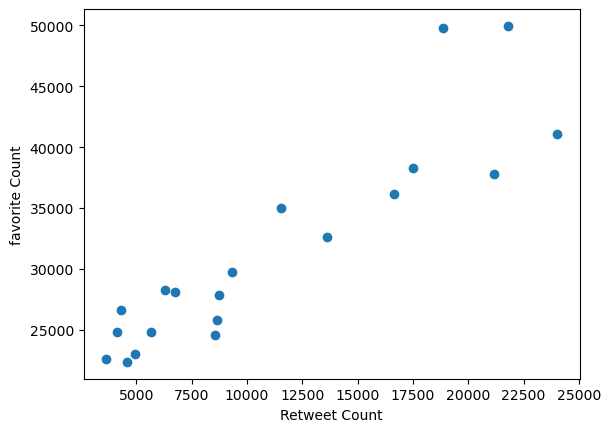

In [177]:
# Sort the DataFrame by "favourites_count" in descending order
df = df.sort_values("favorite_count", ascending=False)

# Select the top 20 rows
top_20 = df.head(20)

# Create a scatter plot of the "retweet_count" and "favourites_count" columns
plt.scatter(top_20["retweet_count"], top_20["favorite_count"])

# Add labels to the x and y axis
plt.xlabel("Retweet Count")
plt.ylabel("favorite Count")

# Show the plot
plt.show()

plt.show()

#### The scatter plot show a positive correlation between favourite_count and retweet_count which could mean that the more a tweet is liked the more chances it has of it being retweeted.


2. The division of dog stages.

The stage similarly, I check the division of dog stages. It shows that ‘pupper’ (a small doggo, usually younger) 
is the most popular dog stage, followed by ‘doggo’ and ‘puppo’. It could be due to the young and unmatured dog is usually cuter than the adult dog. It should also be noticed that there’s huge amount missing data in dog 
stages, thus the distribution may not reflect the truth.

In [178]:
Counted favorite and a possible sensitive appealable 

SyntaxError: invalid syntax (1058790426.py, line 1)

In [ ]:
df = df.sort_values("favorite_count", ascending=False)
top_10 = df.head(10)
plt.bar(np.arange(10), top_10["favorite_count"])
plt.xticks(np.arange(10), top_10["id"], rotation=90)
plt.xlabel("favorite_count")
plt.ylabel("possibly_sensitive_appealable") 
plt.show()

In [ ]:
The above data was done to anaylyse if one of the reasons why an appeal or a possible appeal might have happened was based on 
the favorite tweet count. It seems like the more the tweeet has been counted as favorite the better chance it has for an appeal of 
the votes done. 
